In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [143]:
df = pd.read_csv('houses.csv', sep=',')

In [144]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [145]:
df.shape

(13200, 7)

In [146]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [147]:
pps_min_threshold, pps_max_threshold = df['price_per_sqft'].quantile([0.001, 0.999])
pps_min_threshold, pps_max_threshold

(1366.184, 50959.36200000098)

In [148]:
df1 = df[(df.price_per_sqft > pps_min_threshold) & (df.price_per_sqft < pps_max_threshold)]

In [149]:
df1.shape

(13172, 7)

In [150]:
pps_std = df1['price_per_sqft'].std()
pps_mean = df1['price_per_sqft'].mean()
pps_std, pps_mean

(4141.020700174613, 6663.6537351958705)

In [151]:
pps_up = pps_mean + 4*pps_std
pps_low = pps_mean - 4*pps_std
pps_up, pps_low

(23227.73653589432, -9900.429065502582)

In [152]:
df2 = df1[(df1['price_per_sqft'] < pps_up) & (df1['price_per_sqft'] > pps_low)]

In [153]:
df2.shape

(13047, 7)

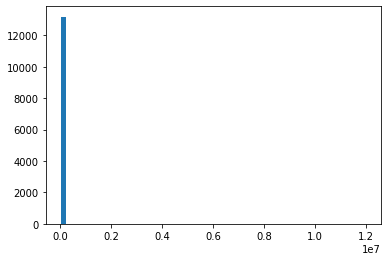

In [154]:
plt.hist(df.price_per_sqft, bins=50, rwidth=0.8);

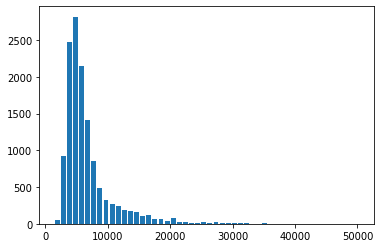

In [155]:
plt.hist(df1.price_per_sqft, bins=50, rwidth=0.8);

In [156]:
df1['z_score'] = (df1['price_per_sqft'] - pps_mean) / pps_std

In [157]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [158]:
df3 = df1[(df1['z_score'] < 4) & (df1['z_score'] > -4)]

In [159]:
df3.shape

(13047, 8)